In [15]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

In [16]:
def rho_red_light(x,rho_max):
    rho = rho_max*numpy.ones_like(x)
    mask = numpy.where(x<3.0)
    rho[mask]=0.5*rho_max
    return rho

In [33]:
nx=81
L = 4.0
dx = L/(nx-1)
nt = 80
rho_max = 10
u_max=1.0
x = numpy.linspace(0.0,L,num=nx)
rho0 = rho_red_light(x,rho_max)
a=5
b=10

In [34]:
def flux (rho,rho_max,u_max):
    F = rho * u_max * (1.0 - rho / rho_max)
    return F


In [35]:
def Lax(rho0,nt,dt,dx,u_max,rho_max):
    rho_hist=[rho0.copy()]
    rho=rho0.copy()
    for n in range (nt):
        F = flux(rho,rho_max,u_max)
        rho[1:-1]=0.5*(rho[2:]+rho[:-2])-dt*0.5/dx*(F[2:]-F[:-2])
        rho[0]=5
        rho[-1]=10
        rho_hist.append(rho.copy())
    return rho_hist
    

In [42]:
sigma = 1
dt=sigma*dx/u_max
rho_hist = Lax(rho0,nt,dt,dx,u_max,rho_max)

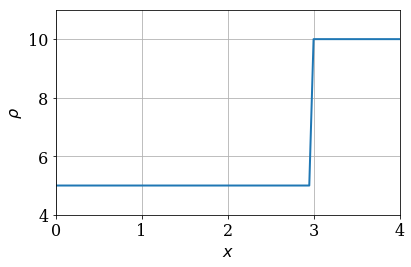

In [43]:
ig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(4.0, 11.0)
pyplot.tight_layout()

In [44]:
import ipywidgets

# create a function to plot your solution
def plot_density(n, rho_hist):
   pyplot.figure(figsize=(8.0,4.0))
   pyplot.xlabel('Distance [km]')
   pyplot.ylabel('Density [cars / km]')
   pyplot.grid()
   pyplot.plot(x, rho_hist[0], label='Initial')
   pyplot.plot(x, rho_hist[n], label='Time step {}'.format(n))
   pyplot.ylim(rho_hist[0].min() - 1.0, rho_hist[0].max() + 1.0)
   pyplot.legend()

# create a ipywidgets slider for the time levels
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                description='time step')

# create the ipywidgets interactive figure
w = ipywidgets.interactive(plot_density,
                              n=nt_slider,
                              rho_hist=ipywidgets.fixed(rho_hist))

# display the interactive figure
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…

In [13]:
def ftfs (rho0,nt,dt,dx,u_max,rho_max):
    rho_hist=[rho0.copy()]
    rho=rho0.copy()
    for n in range (nt):
        F = flux(rho,rho_max,u_max)
        rho[1:]=rho[:-1]-dt/dx*(F[1:]-F[:-1])
        rho[0]=5
        rho[-1]=10
        rho_hist.append(rho.copy())
    return rho_hist
sigma = 0.5
dt=sigma*dx/u_max
rho_hist = ftfs(rho0,nt,dt,dx,u_max,rho_max)   

In [14]:

import ipywidgets

# create a function to plot your solution
def plot_density(n, rho_hist):
   pyplot.figure(figsize=(8.0,4.0))
   pyplot.xlabel('Distance [km]')
   pyplot.ylabel('Density [cars / km]')
   pyplot.grid()
   pyplot.plot(x, rho_hist[0], label='Initial')
   pyplot.plot(x, rho_hist[n], label='Time step {}'.format(n))
   pyplot.ylim(rho_hist[0].min() - 1.0, rho_hist[0].max() + 1.0)
   pyplot.legend()

# create a ipywidgets slider for the time levels
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                description='time step')

# create the ipywidgets interactive figure
w = ipywidgets.interactive(plot_density,
                              n=nt_slider,
                              rho_hist=ipywidgets.fixed(rho_hist))

# display the interactive figure
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…